##### Bibliothèques

In [1]:
import numpy as np # library pour les calculs numériques
import matplotlib.pyplot as plt # library pour les graphique

##### On charge les données ECG depuis le fichier txt

In [2]:
data = np.loadtxt('C:/Users/user/OneDrive/Documents/M2 SNS IDS/HAH913E - Santé activité physique 5/GitHub/HAH913E-2024-ECG_001/ECGu.txt')

##### Paramètres de l'ECG

In [3]:
Fs = 1024  # Sampling frequency / Fréquence d'échantillonnage en Hz / f = 1/T
gain = 520  # A/D converter gain en 520 µV per unit / Gain du convertisseur

###### On crée un axe temporel pour tracer le signal dans le temps 

In [4]:
time = np.arange(0, len(data) / Fs, 1 / Fs) # # On calcule le temps à partir de la longueur des données

In [5]:
ecg_signal = data * gain

#####  Tracé des 3 leads I, II, III sur le même graphique

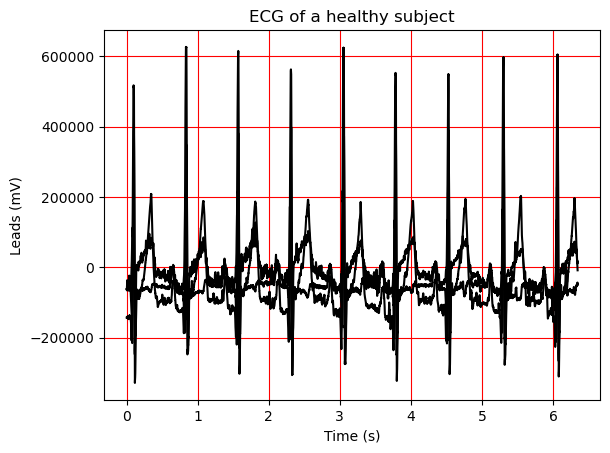

In [6]:
# Plot all three leads (I, II, III) on the same graph
plt.plot(time, ecg_signal, color='black')   # On trace le signal ECG complet
plt.title('ECG of a healthy subject')  # le titre 
# Axes
plt.xlabel('Time (s)')  # le temps en secondes
plt.ylabel('Leads (mV)')  # l'amplitude du signal en mV

plt.grid(True) # grille
plt.grid(color='red') # On affiche la grille en rouge

plt.show() # affiche le graphe

#####  Tracé des 3 leads I, II, III on the same graph in different colors


In [7]:
# On récupère chaque lead séparément 
ecg_lead1 = data[:, 0] * gain  # lead I
ecg_lead2 = data[:, 1] * gain  # lead II
ecg_lead3 = data[:, 2] * gain  # lead III

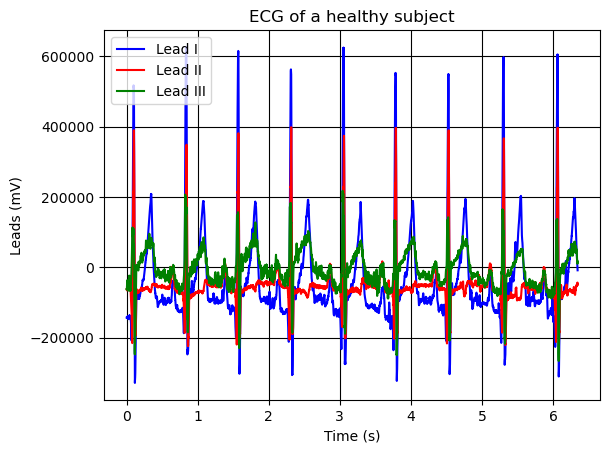

In [11]:
# On trace le Lead I en bleu
plt.plot(time, ecg_lead1, label='Lead I', color='blue')

# Lead II en rouge
plt.plot(time, ecg_lead2, label='Lead II', color='red')

# Lead III en vert
plt.plot(time, ecg_lead3, label='Lead III', color='green')

plt.title('ECG of a healthy subject')  # le titre du graphique

# Axes
plt.xlabel('Time (s)')  # le temps en secondes
plt.ylabel('Leads (mV)')  # l'amplitude du signal en mV

plt.grid(True) # grille
plt.legend()  # affiche la légende des leads
plt.grid(color='black') # On affiche la grille en noir
plt.show() # affiche le graphe

######  Maintenant on affiche chaque lead individuellement

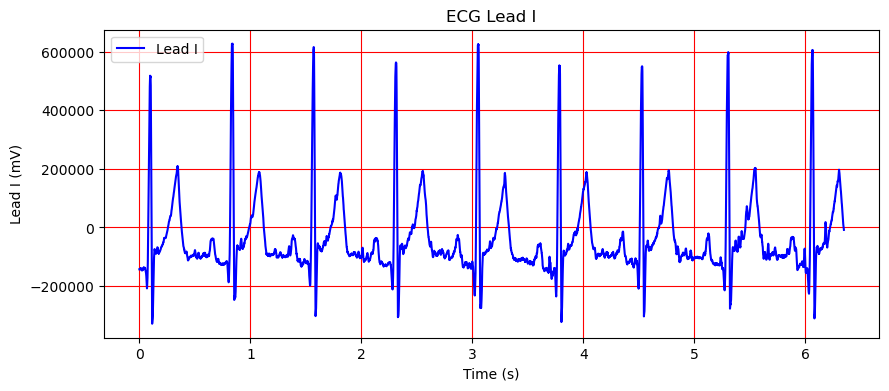

In [97]:
# Lead I
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead1, label='Lead I', color='blue')
plt.title('ECG Lead I') # le titre du graphique
# Axes
plt.xlabel('Time (s)')  # le temps en secondes
plt.ylabel('Lead I (mV)')  # l'amplitude du signal en mV
plt.grid(True) # grille
plt.grid(color='red') # On affiche la grille en rouge
plt.legend()  # affiche la légende
plt.show() # affiche le graphe

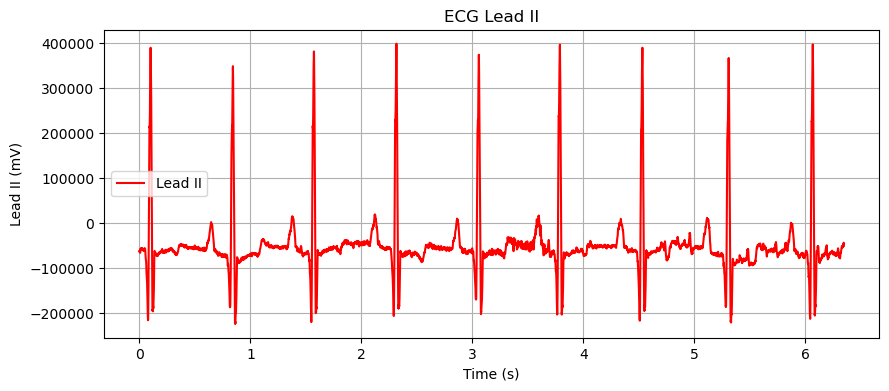

In [98]:
# Lead II
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead2, label='Lead II', color='red')
plt.title('ECG Lead II') # le titre du graphique
# Axes
plt.xlabel('Time (s)')  # le temps en secondes
plt.ylabel('Lead II (mV)')  # l'amplitude du signal en mV
plt.grid(True) # grille
plt.legend()  # affiche la légende
plt.show() # affiche le graphe

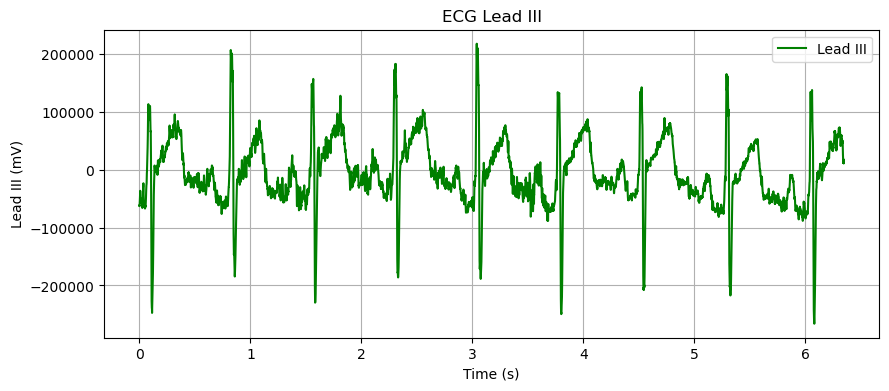

In [99]:
# Lead III
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead3, label='Lead III', color='green')
plt.title('ECG Lead III') # le titre du graphique
# Axes
plt.xlabel('Time (s)')  # le temps en secondes
plt.ylabel('Lead III (mV)') # l'amplitude du signal en mV
plt.grid(True) # grille
plt.legend()  # affiche la légende
plt.show() # affiche le graphe

###### On applique un filtre passe bas / low pass filter

In [100]:
from scipy.signal import butter, filtfilt # les fonctions nécessaires pour créer un filtre passe-bas / butter pour créer le filtre / filtfilt pour appliquer le filtre 

In [101]:
# fonction pour appliquer un filtre passe-bas
def low_pass_filter(data, cutoff, fs, order=2):
    nyquist = 0.5 * fs  # on calcule la fréquence de Nyquist
    normal_cutoff = cutoff / nyquist  # la fréquence de coupure 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # On crée le filtre passe bas 
    return filtfilt(b, a, data)  # On applique le filtre aux données et on retourne le signal filtré


In [102]:
# Paramètres du filtre
cutoff = 30  # fréquence de coupure
fs = 1024  # fréquence d'échantillonnage

In [103]:
# On applique le filtre à chaque lead
ecg_lead1_filtered = low_pass_filter(ecg_lead1, cutoff, fs)
ecg_lead2_filtered = low_pass_filter(ecg_lead2, cutoff, fs)
ecg_lead3_filtered = low_pass_filter(ecg_lead3, cutoff, fs)


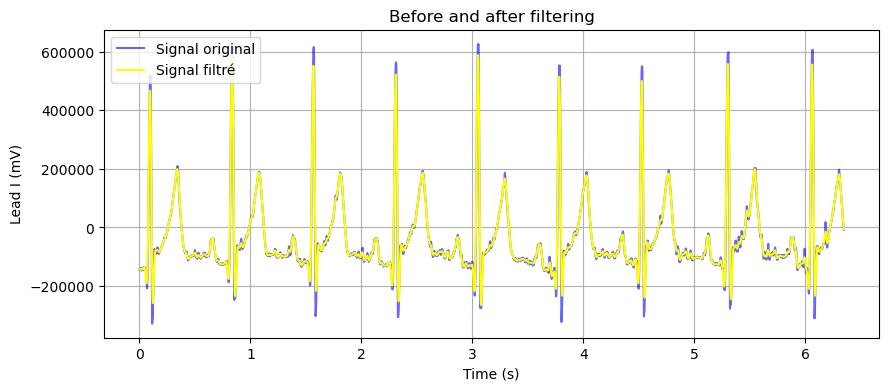

In [104]:
# Lead I, signal original et filtré 
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead1, label='Signal original', color='blue', alpha=0.6) # signal original en blue
plt.plot(time, ecg_lead1_filtered, label='Signal filtré', color='yellow') # signal filtré en jaune
plt.title('Before and after filtering')  # le titre du graphique
# Axes
plt.xlabel('Time (s)')  # le temps en secondes
plt.ylabel('Lead I (mV)') # l'amplitude du signal en mV
plt.grid(True) # grille
plt.legend()  # affiche la légende
plt.show() # affiche le graphe

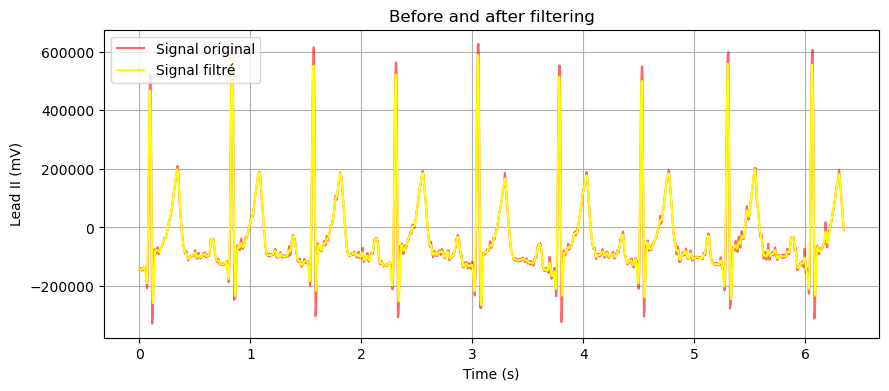

In [105]:
# Lead II, signal original et filtré 
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead1, label='Signal original', color='red', alpha=0.6) # signal original en blue
plt.plot(time, ecg_lead1_filtered, label='Signal filtré', color='yellow') # signal filtré en jaune
plt.title('Before and after filtering')  # le titre 
# Axes
plt.xlabel('Time (s)')  # le temps en secondes
plt.ylabel('Lead II (mV)') # l'amplitude du signal en mV
plt.grid(True) # grille
plt.legend()  # affiche la légende
plt.show() # affiche le graphe

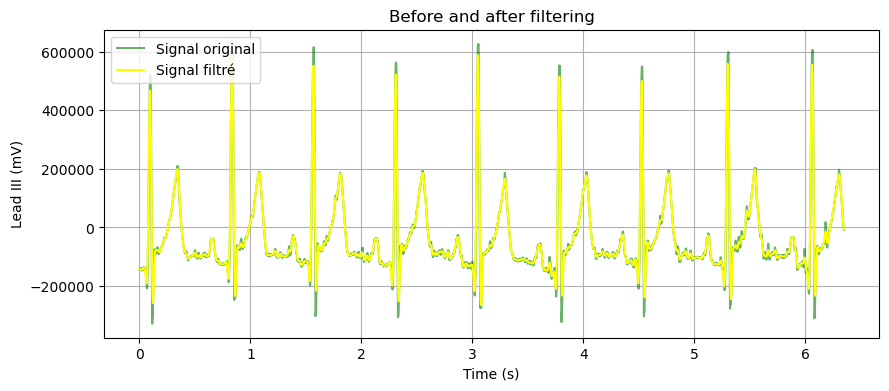

In [106]:
# Lead III, signal original et filtré 
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead1, label='Signal original', color='green', alpha=0.6) # signal original en blue
plt.plot(time, ecg_lead1_filtered, label='Signal filtré', color='yellow') # signal filtré en jaune
plt.title('Before and after filtering')  # le titre 
# Axes
plt.xlabel('Time (s)')  # le temps en secondes
plt.ylabel('Lead III (mV)') # l'amplitude du signal en mV
plt.grid(True) # grille
plt.legend()  # affiche la légende
plt.show() # affiche le graphe

##### Answers to the questions : 


Does this ECG look correctly scaled to you? Please explain :

L’ecg obtenu montre les caractéristiques d'un sujet en bonne santé avec un rythme cardiaque régulier, l'espace entre les pics QRS est constant et régulier, ce qui indique un rythme sinusal normal, et sur une période de 1000 secs, on remarque plusieurs pics correspondant à une fréquence cardiaque normale, tandis que les amplitudes du signal varient entre -500 µV et 1000 µV, ce qui est dans la plage standard et les trois courbes en bleu, orange et vert représentent les leads I, II et III, et bien que la durée affichée surle graphe semble plus longue que celle d'un ECG standard, les pics QRS montrent que le battement cardiaque est stable.

The ecg shows that the subject is healthy and has a regular heart rate, the spacing between the QRS peaks is consistent, indicating a normal rhythm and over 1000 secs, we can see several peaks, suggesting that the subject maintains a normal heart rate, the signal amplitudes range from -500 µV to 1000 µV, which is well within the standard range. The three graphs in blue, orange, and green represent leads I, II, and III.

Is this a normal ECG? Please explain :

Yes, the ECG appears normal, showing regular QRS complexes without any abnormal peaks
Overall, this ECG reflects normal heart activity.